## Basics of Time Series, useful utilities

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from datetime import datetime
from dateutil.parser import parse

In [3]:
now = datetime.now()
now

datetime.datetime(2020, 9, 29, 13, 46, 16, 935356)

### Parse with the help of Dateutil
Try different expressions and see if it works correctly

In [7]:
parse('Jan 30, 2023 10:45:7.5667 PM')

datetime.datetime(2023, 1, 30, 22, 45, 7, 566700)

## Generate a time series, note the use of ranges for dates, the number of periods and frequencies. Note how the data can be shifted
Try different frequencies like BM, W-MON, D, H and study the results


In [12]:
ts = pd.Series(np.random.randn(10),
    index=pd.date_range('1/1/2020', periods=10, freq='BM'))
print(ts)
print(ts.shift(-1))
ts / ts.shift(-1) - 1

2020-01-31    0.906101
2020-02-28    0.980583
2020-03-31    0.647050
2020-04-30   -0.892125
2020-05-29   -0.547999
2020-06-30    0.415422
2020-07-31   -0.714079
2020-08-31    0.065456
2020-09-30   -0.514648
2020-10-30   -0.769559
Freq: BM, dtype: float64
2020-01-31    0.980583
2020-02-28    0.647050
2020-03-31   -0.892125
2020-04-30   -0.547999
2020-05-29    0.415422
2020-06-30   -0.714079
2020-07-31    0.065456
2020-08-31   -0.514648
2020-09-30   -0.769559
2020-10-30         NaN
Freq: BM, dtype: float64


2020-01-31    -0.075957
2020-02-28     0.515468
2020-03-31    -1.725290
2020-04-30     0.627970
2020-05-29    -2.319136
2020-06-30    -1.581759
2020-07-31   -11.909314
2020-08-31    -1.127186
2020-09-30    -0.331243
2020-10-30          NaN
Freq: BM, dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

In [13]:
p = pd.Period(2019, freq='A-DEC')
print(p, p.freq)
p+2

2019 <YearEnd: month=12>


Period('2021', 'A-DEC')

## Example of Sampling
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

In [14]:
rng2=pd.date_range('6/1/2020 03:58:00', periods = 8, freq='min')
ts2 = pd.Series(range(len(rng2)), index=rng2)
ts2

2020-06-01 03:58:00    0
2020-06-01 03:59:00    1
2020-06-01 04:00:00    2
2020-06-01 04:01:00    3
2020-06-01 04:02:00    4
2020-06-01 04:03:00    5
2020-06-01 04:04:00    6
2020-06-01 04:05:00    7
Freq: T, dtype: int64

In [18]:
#ts2.resample('5T').ohlc()

In [19]:
#Left Labels, Left Closed
#ts2.resample('2T').sum()

In [17]:
ts2.resample('2T',label='right',
             closed='right').sum()

2020-06-01 03:58:00     0
2020-06-01 04:00:00     3
2020-06-01 04:02:00     7
2020-06-01 04:04:00    11
2020-06-01 04:06:00     7
Freq: 2T, dtype: int64

In [20]:
ts2.resample('30S').pad()[0:20]

2020-06-01 03:58:00    0
2020-06-01 03:58:30    0
2020-06-01 03:59:00    1
2020-06-01 03:59:30    1
2020-06-01 04:00:00    2
2020-06-01 04:00:30    2
2020-06-01 04:01:00    3
2020-06-01 04:01:30    3
2020-06-01 04:02:00    4
2020-06-01 04:02:30    4
2020-06-01 04:03:00    5
2020-06-01 04:03:30    5
2020-06-01 04:04:00    6
2020-06-01 04:04:30    6
2020-06-01 04:05:00    7
Freq: 30S, dtype: int64

In [21]:
ts2.resample('30S').interpolate(method='linear', limit=2)

2020-06-01 03:58:00    0.0
2020-06-01 03:58:30    0.5
2020-06-01 03:59:00    1.0
2020-06-01 03:59:30    1.5
2020-06-01 04:00:00    2.0
2020-06-01 04:00:30    2.5
2020-06-01 04:01:00    3.0
2020-06-01 04:01:30    3.5
2020-06-01 04:02:00    4.0
2020-06-01 04:02:30    4.5
2020-06-01 04:03:00    5.0
2020-06-01 04:03:30    5.5
2020-06-01 04:04:00    6.0
2020-06-01 04:04:30    6.5
2020-06-01 04:05:00    7.0
Freq: 30S, dtype: float64

### More examples on 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

# Data Analysis Example begins here

In [9]:
#Load the data
data = pd.read_csv(r"C:\Users\gagan\Desktop\IITBh\DS250\0_Projects\Datasets\Expense.csv")

In [10]:
data.shape

(300, 2)

In [11]:
data.head(2)

,Time,Expense
0,5/1/2017,1199436
1,5/2/2017,1045515


In [12]:
data.columns

Index(['Time', 'Expense'], dtype='object')

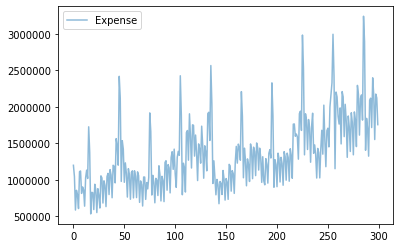

In [13]:
data.plot(alpha=0.5, style='-')
plt.show()

## Converting Time to be an index, to make calculations easier

In [14]:
data['Time']= pd.to_datetime(data['Time'])
# Set the index to the 'date' column
data.set_index('Time', inplace = True)
data.dtypes

Expense    int64
dtype: object

In [15]:
data.head()

,Expense
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


In [16]:
data.describe()

,Expense
count,3.000000e+02
mean,1.348372e+06
std,4.807021e+05
min,5.329500e+05
25%,9.957090e+05
50%,1.272089e+06
75%,1.632589e+06
max,3.242154e+06


<Figure size 5760x1080 with 0 Axes>

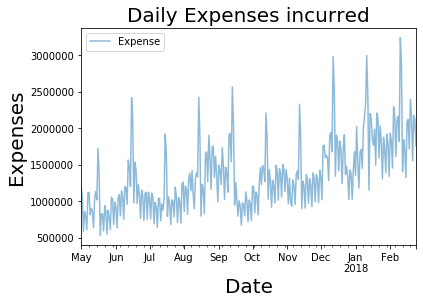

In [17]:
plt.figure(figsize=(80, 15))
data.plot(alpha=0.5, style='-')
plt.title('Daily Expenses incurred', fontsize=20)
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

### Sampling makes the chart easier to interpret while losing information

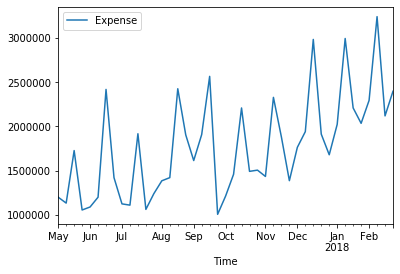

In [18]:
# Max Values per month
data.resample('W').max().plot()

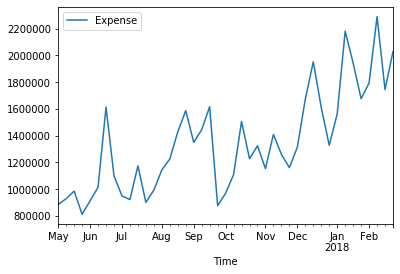

In [19]:
# Avg Values per month
data.resample('W').mean().plot()

### On which date are the expenses highest? What is the difference between those dates?

In [20]:
data.groupby(pd.Grouper(freq="M")).Expense.idxmax()

Time
2017-05-31   2017-05-16
2017-06-30   2017-06-15
2017-07-31   2017-07-15
2017-08-31   2017-08-14
2017-09-30   2017-09-13
2017-10-31   2017-10-13
2017-11-30   2017-11-12
2017-12-31   2017-12-12
2018-01-31   2018-01-11
2018-02-28   2018-02-10
Freq: M, Name: Expense, dtype: datetime64[ns]

In [21]:
summary=data.groupby(pd.Grouper(freq="M")).agg(
    max_Expense = pd.NamedAgg(column='Expense', aggfunc='max'),
    max_Date = pd.NamedAgg(column='Expense', aggfunc='idxmax'))

In [22]:
summary['max_Date'][1]-summary['max_Date'][2]

Timedelta('-30 days +00:00:00')

In [23]:
summary

,max_Expense,max_Date
Time,,
2017-05-31,1726870,2017-05-16
2017-06-30,2418723,2017-06-15
2017-07-31,1917268,2017-07-15
2017-08-31,2426361,2017-08-14
2017-09-30,2566462,2017-09-13
2017-10-31,2209056,2017-10-13
2017-11-30,2328862,2017-11-12
2017-12-31,2984329,2017-12-12
2018-01-31,2995029,2018-01-11


In [24]:
summary.shift(1)

,max_Expense,max_Date
Time,,
2017-05-31,NaN,NaT
2017-06-30,1726870.0,2017-05-16
2017-07-31,2418723.0,2017-06-15
2017-08-31,1917268.0,2017-07-15
2017-09-30,2426361.0,2017-08-14
2017-10-31,2566462.0,2017-09-13
2017-11-30,2209056.0,2017-10-13
2017-12-31,2328862.0,2017-11-12
2018-01-31,2984329.0,2017-12-12


In [25]:
summary-summary.shift(1)

,max_Expense,max_Date
Time,,
2017-05-31,NaN,NaT
2017-06-30,691853.0,30 days
2017-07-31,-501455.0,30 days
2017-08-31,509093.0,30 days
2017-09-30,140101.0,30 days
2017-10-31,-357406.0,30 days
2017-11-30,119806.0,30 days
2017-12-31,655467.0,30 days
2018-01-31,10700.0,30 days


### Interestingly, it turns out that there is a monthly peak every thirty days apart!!

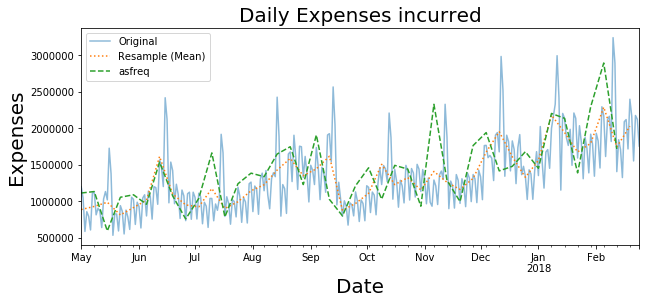

In [26]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
data.plot(alpha=0.5, style='-',ax=ax)
data.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
data.asfreq('W').plot(style='--',ax=ax);          ## Alternate method that also supports padding/backfill of missing values
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily Expenses incurred', fontsize=20)
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

## EXERCISE: Make a plot for the following:

Simple Moving average over a week: The average expenses over the past 7 days

Cumulative Moving average: Average of all the expenses incurred thus far

Exponential Moving Average: EW(t)=a.X(t)+(1-a).EW(t-1) ; EW(1)=X(1) 

## Is this series stationary? Does it appear to have a constant mean? Let's apply some statistical tests ....

### If the p-value is greater than the significance level 0.05 so it is not stationary and differencing is as such needed, ie. d > 0. An ARIMA model/analysis can help us figure out how much differencing is needed. Or we can continue differencing on the original series till it passes the adfuller test.

This test itself builds a regression model.....

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

https://www.youtube.com/watch?v=2GxWgIumPTA

https://www.youtube.com/watch?v=X8nGZ2UCJsk

Called Unit Root test because it solves the equation: X(t) = a+ rho*X(t-1) + epsilon


## Null hypothesis here is that the series is non-stationary


In [27]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(data['Expense'].dropna())[1])

p-value: 0.3725419518945788


In [28]:
print("p-value:", adfuller(data['Expense'].diff().dropna())[1])

p-value: 1.602613677302111e-07


#### Note that one level of differencing has made the series stationary. Now, we can continue from this point on as well. After the analysis we can reverse the differencing to come up with the final model.

### Let's learn how to decompose the complex time series into components using moving average models
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='multiplicative', period = 30)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [30]:
trend.head()
# First half of the period is empty
# The last half is also empty .. matter of some investigation

Time
2017-05-01   NaN
2017-05-02   NaN
2017-05-03   NaN
2017-05-04   NaN
2017-05-05   NaN
Name: trend, dtype: float64

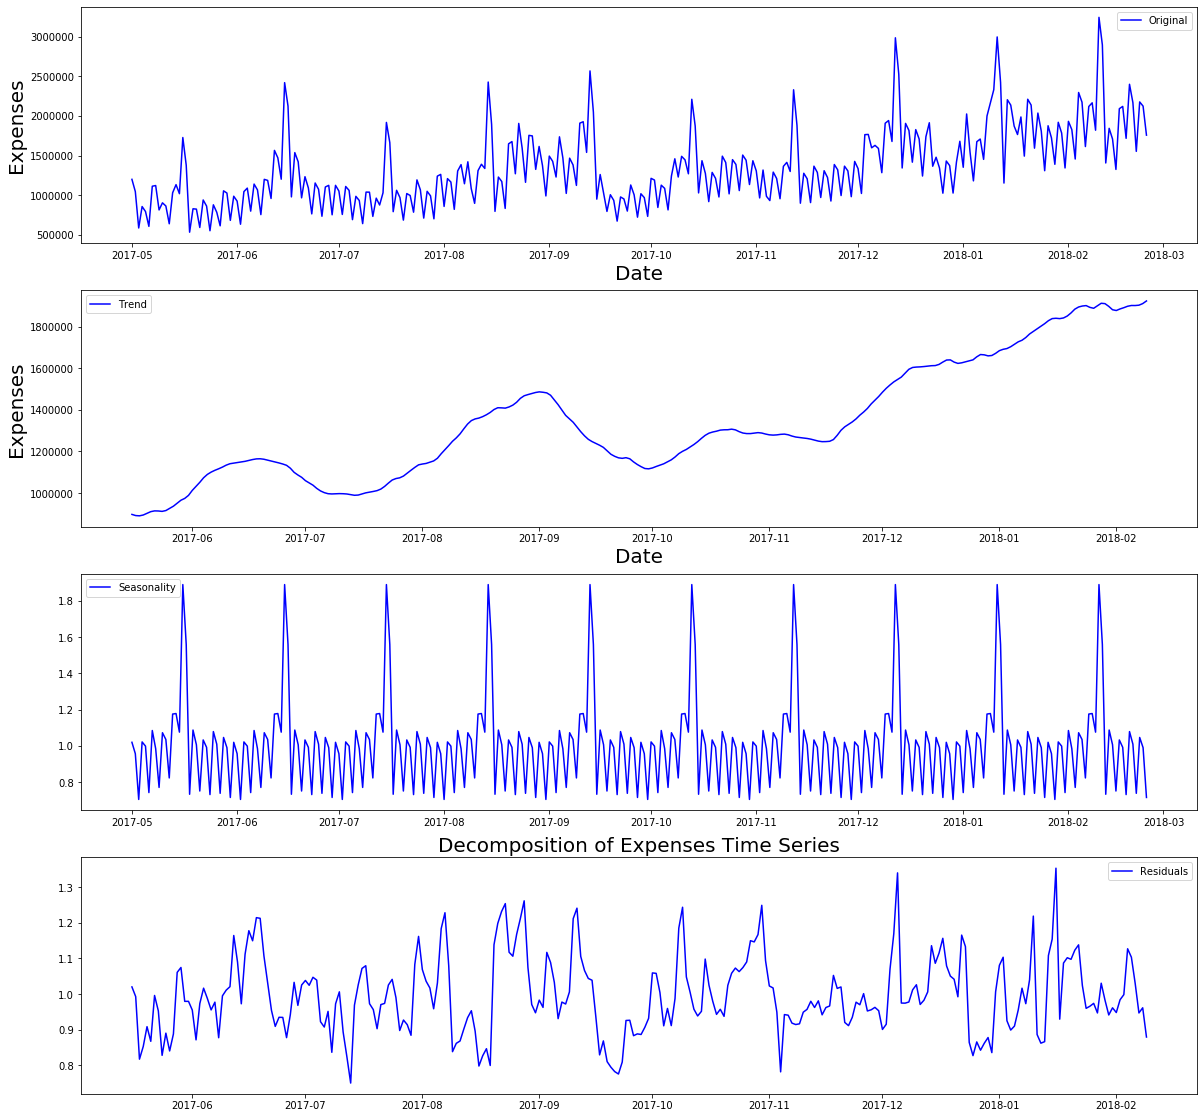

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot gathered statistics
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(data, label='Original', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of Expenses Time Series', fontsize=20)
plt.show()

plt.tight_layout()

In [32]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(trend.dropna())[1])

p-value: 0.9778048393807546


It is obvious that differencing is necessary

## Now I am analysing the Differenced series and decomposing it

In [33]:
data_d = data.diff().dropna()

In [34]:
data_d.shape

(299, 1)

In [35]:
data_d.head(2)

,Expense
Time,
2017-05-02,-153921.0
2017-05-03,-459404.0


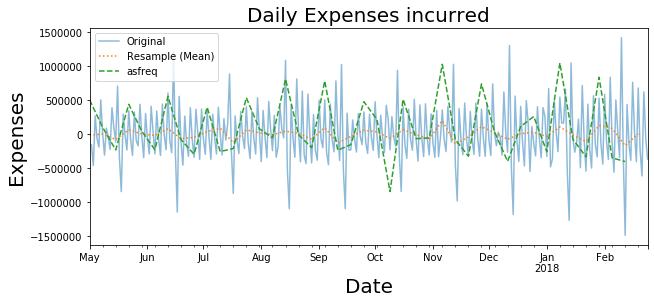

In [36]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
data_d.plot(alpha=0.5, style='-',ax=ax)
data_d.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
data_d.asfreq('W').plot(style='--',ax=ax);          ## Alternate method that also supports padding/backfill of missing values
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily Expenses incurred', fontsize=20)
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

## Since there is no real trend, we need a additive model while doing the decomposition

In [37]:
decomposition_d = seasonal_decompose(data_d, model='additive', period = 30)
trend_d    = pd.DataFrame(decomposition_d.trend.fillna(method='bfill'))     # Backfill missing values
seasonal_d = pd.DataFrame(decomposition_d.seasonal.fillna(method='bfill'))
residual_d = pd.DataFrame(decomposition_d.resid.fillna(method='bfill'))
data_df = pd.DataFrame(decomposition_d.trend+decomposition_d.resid).dropna()

In [38]:
# We can remove the values with nan in the decomposed model, this snippet just prints them out

import math
tt=pd.DataFrame(decomposition_d.trend)

for v in range(0,tt.shape[0]):
    #print (tt.index[v],tt['trend'][v])
    if(math.isnan(tt['trend'][v])):
         print (tt.index[v])

2017-05-02 00:00:00
2017-05-03 00:00:00
2017-05-04 00:00:00
2017-05-05 00:00:00
2017-05-06 00:00:00
2017-05-07 00:00:00
2017-05-08 00:00:00
2017-05-09 00:00:00
2017-05-10 00:00:00
2017-05-11 00:00:00
2017-05-12 00:00:00
2017-05-13 00:00:00
2017-05-14 00:00:00
2017-05-15 00:00:00
2017-05-16 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00
2018-02-20 00:00:00
2018-02-21 00:00:00
2018-02-22 00:00:00
2018-02-23 00:00:00
2018-02-24 00:00:00


In [39]:
data_df.head(5)
# Note the period shift in the output

,0
Time,
2017-05-17,73232.128218
2017-05-18,194505.604144
2017-05-19,-174573.384745
2017-05-20,98703.176366
2017-05-21,89775.050440


In [40]:
data_df.shape

(269, 1)

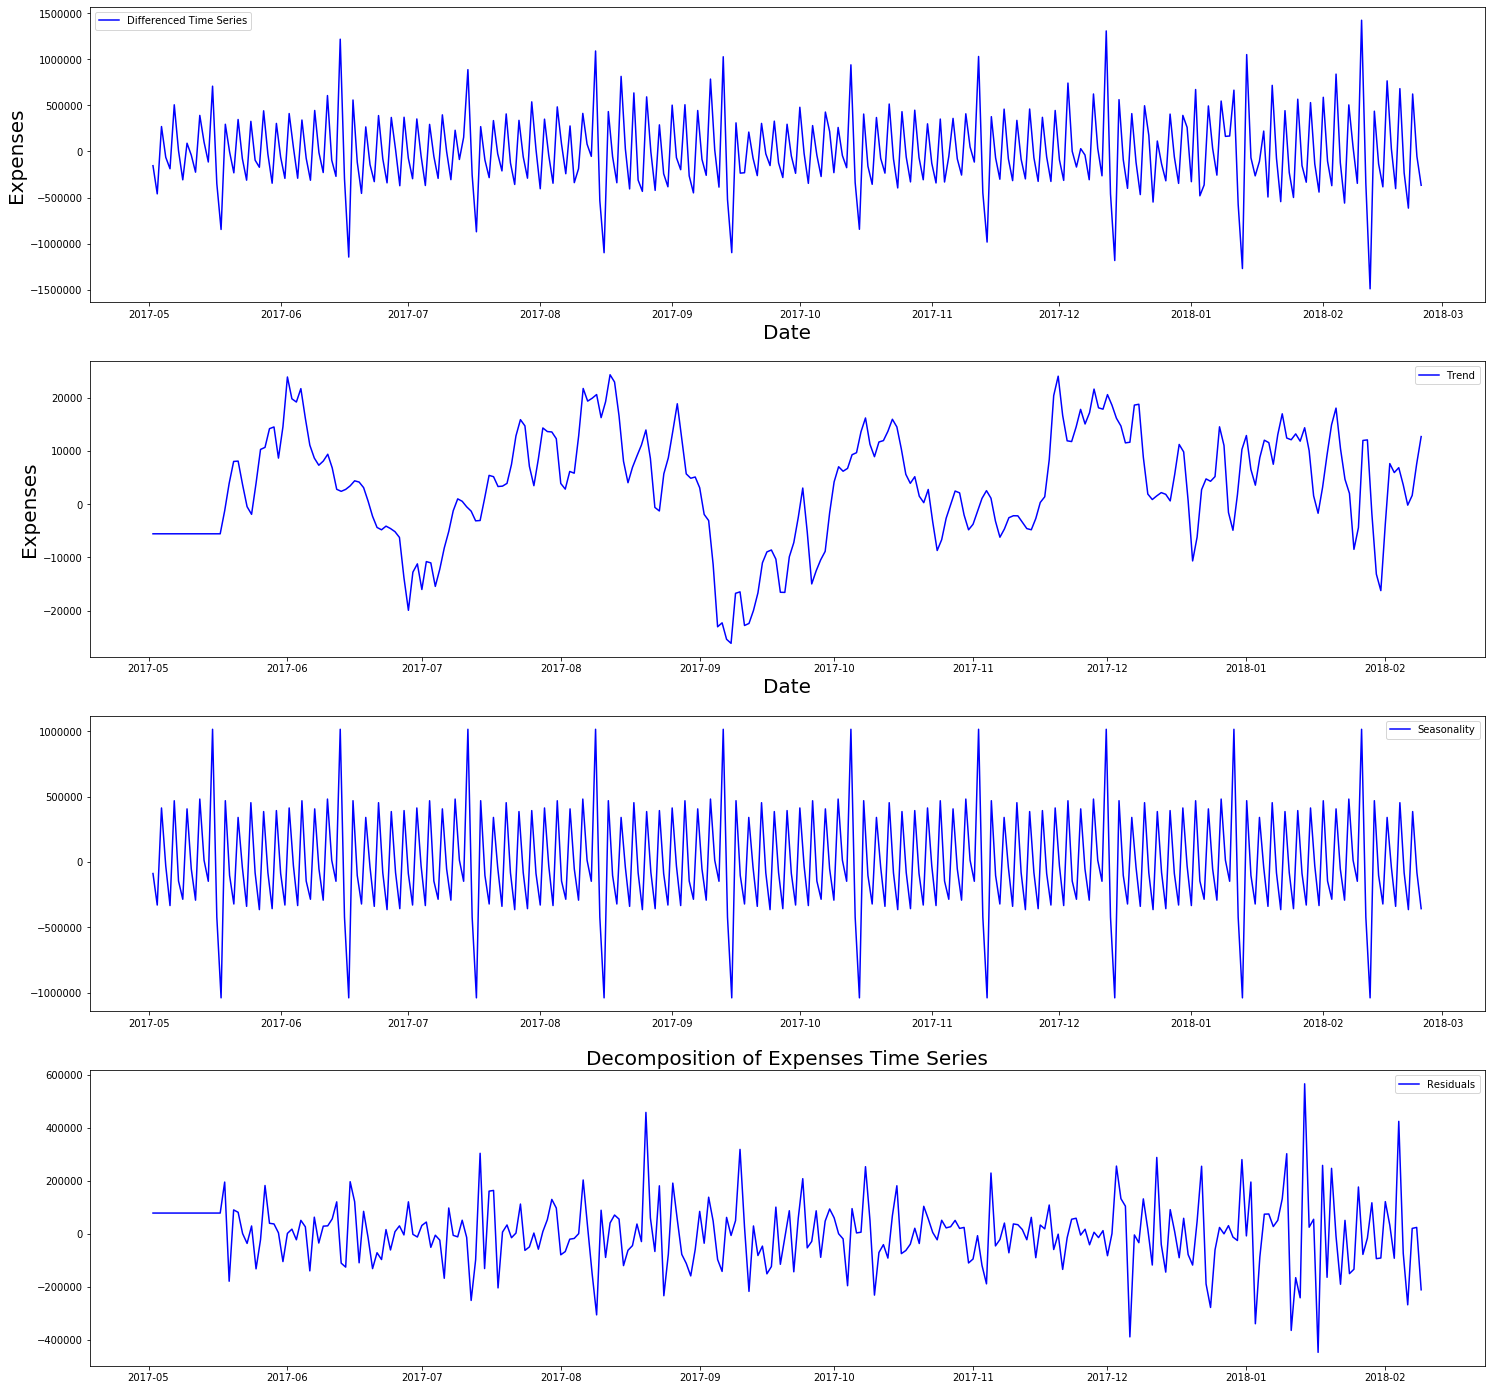

In [41]:
# Plot gathered statistics
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(data_d, label='Differenced Time Series', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend_d, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Expenses',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal_d,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_d, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of Expenses Time Series', fontsize=20)
plt.show()
#plt.tight_layout()

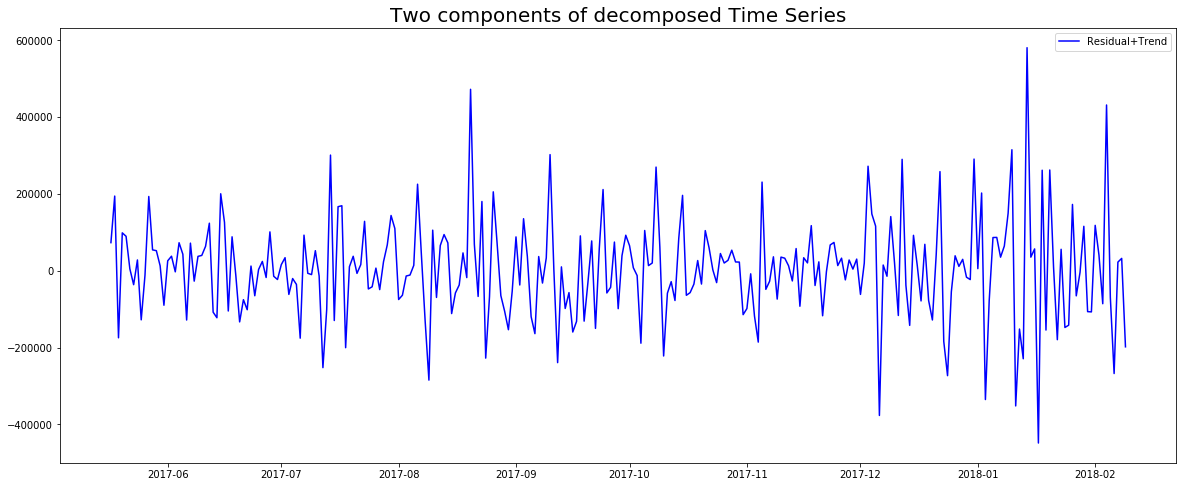

In [42]:
plt.figure(figsize=(20,8))
plt.plot(data_df, label='Residual+Trend', color="blue")
plt.legend(loc='best')
plt.title('Two components of decomposed Time Series', fontsize=20)
plt.show()

In [43]:
seasonal_d.shift(30)

,seasonal
Time,
2017-05-02,NaN
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-06,NaN
...,...
2018-02-20,-82557.454144
2018-02-21,-364350.422662
2018-02-22,386665.153264


In [44]:
seasonal_dd=seasonal_d-seasonal_d.shift(30)

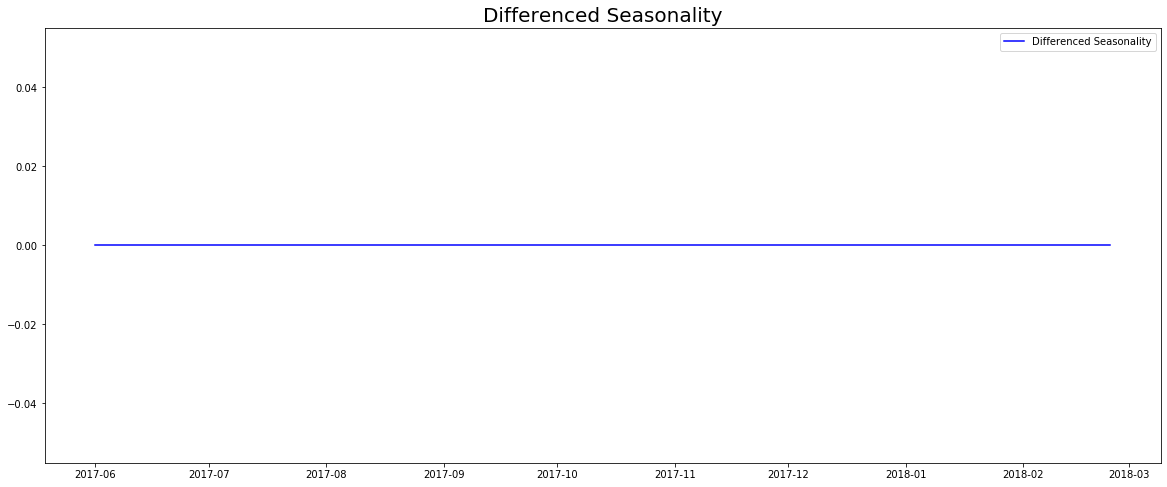

In [45]:
plt.figure(figsize=(20,8))
plt.plot(seasonal_dd, label='Differenced Seasonality', color="blue")
plt.legend(loc='best')
plt.title('Differenced Seasonality', fontsize=20)
plt.show()

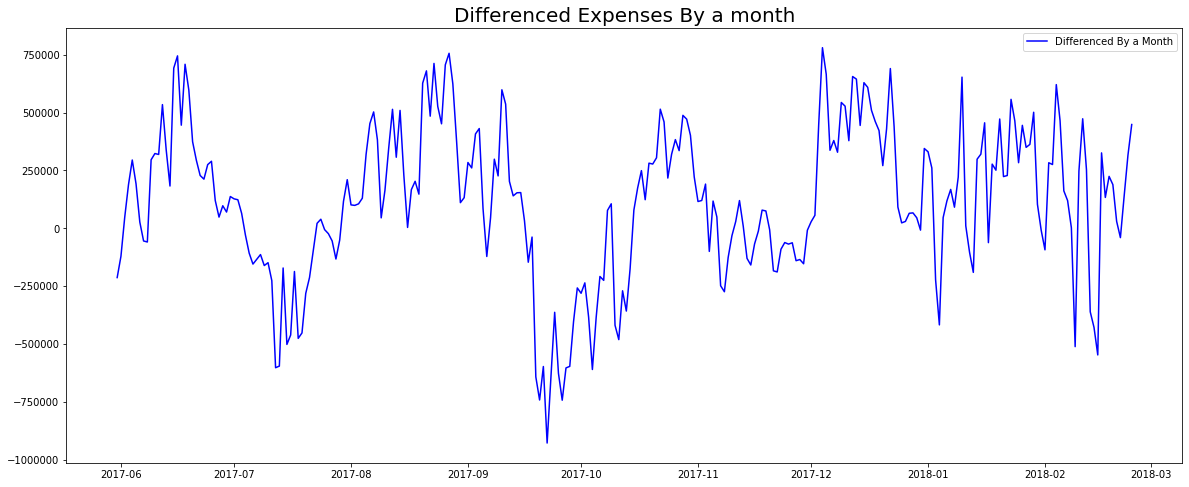

In [46]:
plt.figure(figsize=(20,8))
data_d30=data-data.shift(30)
plt.plot(data_d30, label='Differenced By a Month', color="blue")
plt.legend(loc='best')
plt.title('Differenced Expenses By a month', fontsize=20)
plt.show()

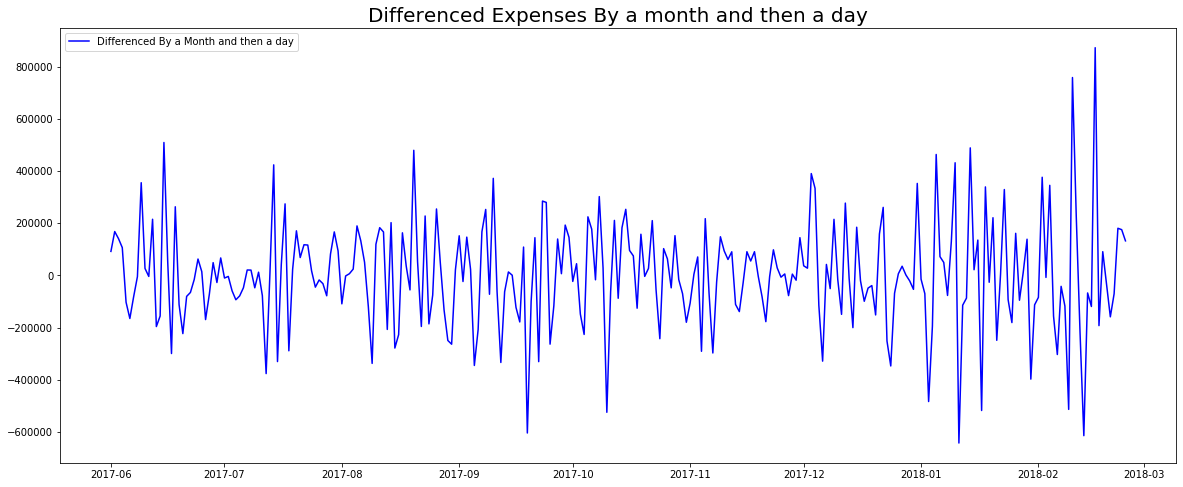

In [47]:
plt.figure(figsize=(20,8))
data_d30_d1=data_d30-data_d30.shift(1)
plt.plot(data_d30_d1, label='Differenced By a Month and then a day', color="blue")
plt.legend(loc='best')
plt.title('Differenced Expenses By a month and then a day', fontsize=20)
plt.show()

## Can we model the trend of the original (non-differenced) series but without seasonality??

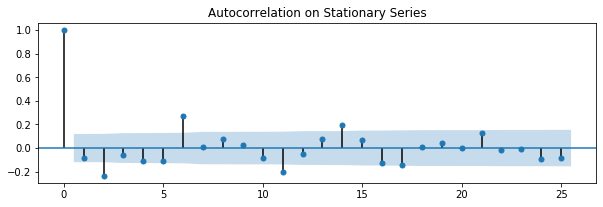

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(data_d30_d1.dropna(), ax=ax1, 
               title="Autocorrelation on Stationary Series") 

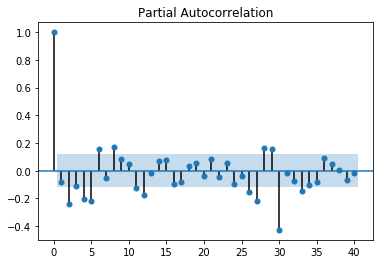

In [50]:
plt.close('all')
plot_pacf(data_d30_d1.dropna(), lags=40)
plt.show()

## Guessing the parameters of ARIMA manually

In [53]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_d30_d1.dropna(), order=(2, 0, 2))
results = model.fit()

C:\Users\gagan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Expense   No. Observations:                  269
Model:                     ARMA(2, 2)   Log Likelihood               -3651.989
Method:                       css-mle   S.D. of innovations         190218.923
Date:                Tue, 29 Sep 2020   AIC                           7315.979
Time:                        13:50:57   BIC                           7337.547
Sample:                    06-01-2017   HQIC                          7324.641
                         - 02-24-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2456.9923   7401.701      0.332      0.740   -1.21e+04     1.7e+04
ar.L1.Expense     1.1998      0.092     13.108      0.000       1.020       1.379
ar.L2.Expense    -0.7536      0.064    -11.732      0.000      -0.879      -0.628
ma.L1.Expense    -1.4066      0.101    -13.918      0.000      -1.605      -1.208
ma.L2.Expense     0.7593      0.086      8.781      0.000       0.590       0.929
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7961           -0.8326j            1.1520           -0.1286
AR.2            0.7961           +0.8326j            1.1520            0.1286
MA.1            0.9262           -0.6776j            1.1476           -0.1005
MA.2            0.9262           +0.6776j            1.1476            0.1005
-----------------------------------------------------------------------------
"""

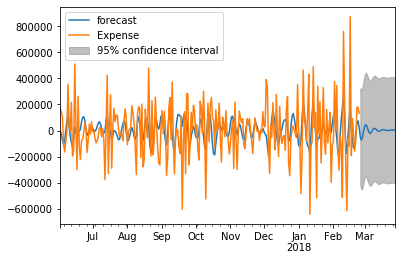

In [56]:
results.plot_predict(1, 300)
plt.show()

In [145]:
pred=results.forecast()

In [59]:
# Perform Fourier transform using scipy
Fs=100.0
from scipy import fftpack
y_fft = fftpack.fft(seasonal.values)

In [60]:
y_fft

array([ 3.00000000e+02-0.00000000e+00j,  1.28389633e-15-4.01765519e-16j,
        7.03513137e-16-6.07483351e-16j,  2.99917282e-16-6.93442022e-16j,
       -7.38580039e-17-6.56325779e-16j, -3.49720253e-15+3.99680289e-15j,
        7.36048578e-16+2.13064082e-16j,  8.92272839e-16-2.53608860e-16j,
        7.56897814e-16-9.86114277e-16j, -1.57119086e-16-2.26169830e-15j,
       -2.23060778e+01-1.99294427e+00j, -1.84170094e-15-2.43207438e-16j,
       -7.25638147e-16+5.52555098e-16j, -7.06698694e-17+6.15903718e-16j,
        2.07050095e-16+2.87400530e-16j, -3.33066907e-16+4.44089210e-16j,
       -1.67558756e-16+2.15622337e-16j, -8.26527621e-17+6.32950098e-16j,
        4.82875328e-16+7.52783506e-16j,  9.28302477e-16-2.33400561e-16j,
        1.59616075e+01+3.12852563e+00j,  8.75786458e-17-1.00929586e-15j,
       -1.79300407e-17-7.78316775e-16j, -3.11403186e-16-4.11016608e-16j,
       -3.52448443e-16-8.04718097e-17j, -8.88178420e-16+8.88178420e-15j,
        3.45347710e-16-2.85980440e-16j, -2.38923056

C:\Users\gagan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

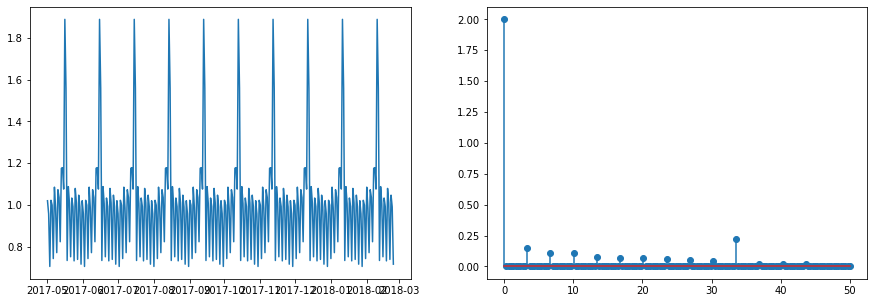

In [61]:
# Plot data
n = np.size(data['Expense'])
fr = Fs/2 * np.linspace(0,1,int(n/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(data.index,seasonal)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain